In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


735 980


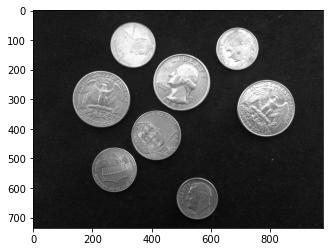

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

path = '/content/drive/MyDrive/Colab Notebooks/Tutoring_LeeJinSeok/'
image = cv2.imread(path + 'coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
print(height, width)

plt.imshow(gray, cmap='gray')
plt.show()

In [ ]:
def gaussian_smoothing(input_img):
  gaussian_filter=np.array([[0.109,0.111,0.109],
                            [0.111,0.155,0.111],
                            [0.109,0.111,0.109]])
                                
  return cv2.filter2D(input_img, -1, gaussian_filter)  

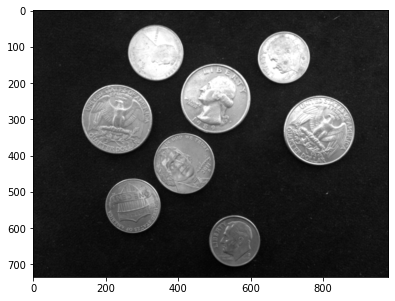

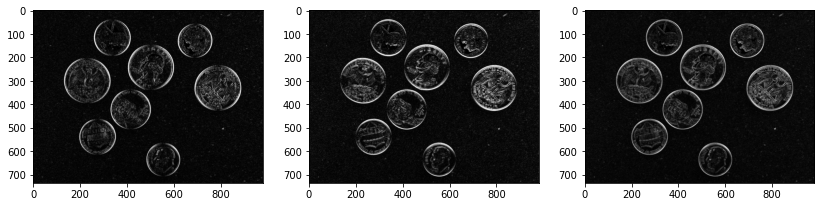

In [ ]:
smoothed_img = gaussian_smoothing(gray)
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(smoothed_img, cmap='gray')


img_sobel_x = cv2.Sobel(smoothed_img, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(smoothed_img, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

img_sobel = cv2.addWeighted(img_sobel_x, 0.3, img_sobel_y, 0.3, 0);

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.imshow(img_sobel_x, cmap='gray')

plt.subplot(132)
plt.imshow(img_sobel_y, cmap='gray')

plt.subplot(133)
plt.imshow(img_sobel, cmap='gray')

plt.show()

70.0
255


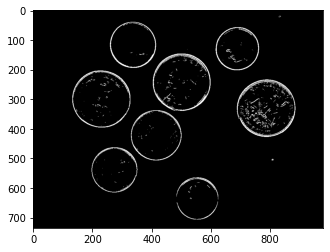

In [ ]:
threshold, binary_img = cv2.threshold(img_sobel, 70, 255, cv2.THRESH_BINARY)

print(threshold)
print(np.amax(binary_img))

plt.imshow(binary_img, cmap='gray')
plt.show()

아래 함수를 작성할 시 opencv 라이브러리를 사용하지 말고 모든 내용을 직접 작성하시기 바람

In [31]:
"""

The implementations of Hough_Circles() function can be done as below:
1)
a. compute the gradient
b. the center of circle is in rmin ~ rmax with gradient direction
c. voting

2) (I will use this method)
a. use the circle property (cos^2 + sin^2 = 1)
b. the edge of circle is in rmin ~ rmax from center of circle
c. voting

"""

# 주어진 영상을 읽고 다양한 반지름의 변화에 따라 일정 threshold 이상 되는 점을 만들기
# 함수에 필요한 변수도 스스로 정하고 이에 따른 함수를 작성하시오
def Hough_Circles(input, circles): 
  rows = input.shape[0]
  cols = input.shape[1]

  # initializing the angles to be computed
  sinang = dict()
  cosang = dict()

  # initializing the angles
  for angle in range(0, 360):
    angle_rad = angle * np.pi / 180 # degree convert to radian
    sinang[angle] = np.sin(angle_rad) 
    cosang[angle] = np.cos(angle_rad)

  # initializing the different raidus (generics images)
  # length = int(rows / 2)
  radius = [i for i in range(50, 70)]

  # initial threshold value
  threshold = 180

  for r in radius:
        # initializing an empty 2D array with zeroes 
        acc_cells = np.full((rows,cols),fill_value=0,dtype=np.uint64)
         
        # iterating through the original image 
        for x in range(rows): 
            for y in range(cols): 
                if input[x][y] == 255: # edge 
                    # increment in the accumulator cells 
                    for angle in range(0, 360): 
                        b = y - round(r * sinang[angle]) # also, b = y + round(r * sinang[angle])
                        a = x - round(r * cosang[angle]) # also, a = x + round(r * cosang[angle]) 
                        if a >= 0 and a < rows and b >= 0 and b < cols: 
                            acc_cells[a][b] += 1 # voting
        print()
        print('*' * 60)                 
        print('for radius:', r)
        acc_cell_max = np.amax(acc_cells)
        print('max acc value:', acc_cell_max)
        
        if(acc_cell_max > threshold):  
            print("detecting the circles for radius:", r)       
            
            # initial threshold
            acc_cells[acc_cells < threshold] = 0  
               
            # find the circles for this radius 
            for i in range(rows): 
                for j in range(cols): 
                    if(i > 0 and j > 0 and i < rows-1 and j < cols-1 and acc_cells[i][j] >= threshold):
                        avg_sum = np.float32((acc_cells[i][j] + acc_cells[i-1][j] + acc_cells[i+1][j] 
                                              + acc_cells[i][j-1] + acc_cells[i][j+1] + acc_cells[i-1][j-1]
                                              + acc_cells[i-1][j+1] + acc_cells[i+1][j-1] + acc_cells[i+1][j+1]) / 9) 
                        print("intermediate avg_sum:", avg_sum)
                        if(avg_sum >= 33):
                            print("for radius:", r, ", average:", avg_sum,"\n")
                            circles.append((i,j,r))
                            acc_cells[i:i+5,j:j+7] = 0




아래 함수를 작성할 시 opencv라이브러리를 사용해도 됨

In [32]:
# 주어진 영상에 원을 가시화하기 위한 함수 만들기
# 함수에 필요한 변수도 스스로 정하고 이에 따른 함수를 작성하시오
def display_Circles(original_img, circles): 

  # print the output
  for vertex in circles:
    cv2.circle(original_img, (vertex[1],vertex[0]),vertex[2], (0,255,0), 1)
    cv2.rectangle(original_img, (vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2), (0,0,255), 3)

  print(circles)

  plt.imshow(original_img) 
  cv2.imwrite(path + 'circle_detected_coins.jpg', original_img) 

주어진 동전을 읽고 결과를 출력하시오


************************************************************
for radius: 50
max acc value: 156

************************************************************
for radius: 51
max acc value: 152

************************************************************
for radius: 52
max acc value: 149

************************************************************
for radius: 53
max acc value: 151

************************************************************
for radius: 54
max acc value: 152

************************************************************
for radius: 55
max acc value: 147

************************************************************
for radius: 56
max acc value: 149

************************************************************
for radius: 57
max acc value: 147

************************************************************
for radius: 58
max acc value: 147

************************************************************
for radius: 59
max acc value: 150

***************************************

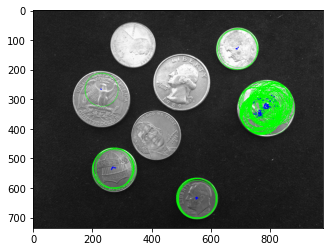

In [33]:
circles = []
Hough_Circles(edged_image, circles)

display_Circles(image, circles)